# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.externals import joblib
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [2]:
iterationNumber = 6

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_01': {'0': ['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
   'I:\\Chuan\\Documents\\MyData\\PhD\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_01']['0']

['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1R.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21486~A.0020.K.jpg.1L.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21563~A.0006.K.jpg.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1L.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1R.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21890~A.0005.K.jpg.1R.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21902~A.0010.K.jpg.1R.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W22451~A.0011.K.jpg.1R.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W22455~A.0002.K.jpg.1L.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Me

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_01': ['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
  'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arr

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  6
chr_01
   Train: 
        w21000~A.0001.K.jpg.1L.bmp
        w21001~A.0008.K.1R.bmp
        w21002~A.0024.K.jpg.1L.bmp
        w21002~A.0024.K.jpg.1R.bmp
        W21011~A.0008.K.1L.bmp
        W21011~A.0008.K.1R.bmp
        W21012~A.0019.K.1R.bmp
        W21014~A.0005.K.1L.bmp
        W21022~A.0007.K.jpg.1L.bmp
        W21022~A.0007.K.jpg.1R.bmp
        W21025~A.0002.K.jpg.1L.bmp
        W21027~A.0003.K.1L.bmp
        W21027~A.0003.K.1R.bmp
        W21486~A.0020.K.jpg.1L.bmp
        W21486~A.0020.K.jpg.1R.bmp
        W21486~A.0020.K.jpg.2L.bmp
        W21486~A.0020.K.jpg.2R.bmp
        W21559~A.0005.1L.bmp
        W21559~A.0005.1R.bmp
        W21563~A.0006.K.jpg.bmp
        W21570~A.0001.K.jpg.1L.bmp
        W21570~A.0001.K.jpg.1R.bmp
        W21576~A.0010.K.jpg.1L.bmp
        W21576~A.0010.K.jpg.1R.bmp
        W21587~A.0008.K.jpg.1L.bmp
        W21587~A.0008.K.jpg.1R.bmp
        W21587~A.0010.K.jpg.1L.bmp
        W21587~A.0010.K.jpg.1R.bmp
        W21588~A.0001.K.jpg.

        W22455~A.0002.K.jpg.13L.bmp
        W22455~A.0002.K.jpg.13R.bmp
        W22666-1.0002.K.jpg.13L.bmp
        W22666-1.0002.K.jpg.13R.bmp
        W22670~A.0006.K.jpg.13L.bmp
        W22670~A.0006.K.jpg.13R.bmp
        W22672~A.0004.K.jpg.13L.bmp
        W22672~A.0004.K.jpg.13R.bmp
        w22881~A.0017.K.jpg.13L.bmp
        w22881~A.0017.K.jpg.13R.bmp
        W23070~A.0001.K.jpg.13L.bmp
        W23070~A.0001.K.jpg.13R.bmp
        W23075-1~A.0017.K.jpg.13R.bmp
        W23082.0026.K.jpg.13L.bmp
        W23082.0026.K.jpg.13R.bmp
        W23084~A.0003.K.jp.13R.bmp
   Test: 
        w21000~A.0001.K.jpg.13R.bmp
        w21002~A.0024.K.jpg.13R.bmp
        w21008~A.0008.K.jpg.13R.bmp
        W21011~A.0008.K.13R.bmp
        W21014~A.0005.K.13L.bmp
        W21025~A.0002.K.jpg.13L.bmp
        W21890~A.0005.K.jpg.13R.bmp
        W21906~A.0011.K.jpg.13R.bmp
        W23075-1~A.0017.K.jpg.13L.bmp
        W23084~A.0003.K.jp.13L.bmp
chr_14
   Train: 
        w21000~A.0001.K.jpg.14L.bmp
        w2

        W18776-Y_15.bmp
        W18776-Y_16.bmp
        W18776-Y_18.bmp
        W18776-Y_19.bmp
        W18776-Y_2.bmp
        W18776-Y_20.bmp
        W18776-Y_21.bmp
        W18776-Y_22.bmp
        W18776-Y_23.bmp
        W18776-Y_3.bmp
        W18776-Y_5.bmp
        W18776-Y_6.bmp
        W18776-Y_8.bmp
        W18776-Y_9.bmp
        W18776-_Y_17.bmp
        w21001~A.0008.K.jpg.y.bmp
        w21002~A.0024.K.jpg.y.bmp
        W21014~A.0005.K.Y.bmp
        W21027~A.0003.K.Y.bmp
        W21486~A.0020.K.bmp.Y.bmp
        W21563~A.0006.K.y.bmp
        W21570~A.0001.K.jpg.Y.bmp
        W21576~A.0010.K.jpg.Y.bmp
        W21587~A.0008.K.jpg.Y.bmp
        W21587~A.0010.K.jpg.Y.bmp
        W21588~A.0001.K.jpg.Y.bmp
        W21766~A.0025.K.jpg.Y.bmp
        W21894~A.0009.K.jpg.Y.bmp
        w22038~A.0017.K.jpg.Y.bmp
        W22451~A.0011.K.jpg.Y.bmp
        W22455~A.0002.K.jpg.Y.bmp
        W22666-1.0002.K.jpg.Y.bmp
        W22672~A.0004.K.jpg.Y.bmp
        W23070~A.0001.K.jpg.Y.bmp
        W23

### 3.1.1. Helper Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [9]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

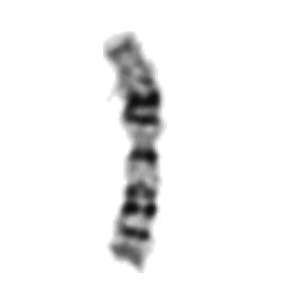

In [10]:
image['chr_01'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [11]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Train 2D to 1D

In [12]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [13]:
x_train_list = []
y_train_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Test 2D to 1D

In [16]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [17]:
x_test_list = []
y_test_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

In [19]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
                24:  'chr_18_p11_deletion',
                25: 'chr_18_q10_isochromosome',
                26: 'chr_9_inversion',
                27: 'chr_5_p14_deletion',
                28: 'chr_x_isochromosome',
                29: 'chr_x_p22_cnv', 
                30: 'chr_x_q21_cnv',
                31: 'chr_x_q22_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [24]:
len(X_train)

2553

In [25]:
X_train[0].shape

(90000,)

## 3.2. Support Vector Machine

In [26]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-1.35525272e-20 -1.35525272e-20 -1.35525272e-20 ... -1.35525272e-20
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.35525272e-20  1.35525272e-20  1.35525272e-20 ...  1.35525272e-20
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   6.77626358e-21  6.77626358e-21]
 [ 2.71050543e-20  2.71050543e-20  2.71050543e-20 ...  2.71050543e-20
  -2.71050543e-20 -2.71050543e-20]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
b =  [-14.74860869 -13.44715677  -6.6879998   -3.09343608  -4.99504622
   1.81498302   4.07382179   7.88240092   9.07491612   6.97222099
   5.83265234   5.45184931   4.81580135   6.21106055   6.87475575
  13.43325911   8.62709604   8.32320815   7.07554931   6.07789343
   7.99999394   7.63273996   7.42793486   4.84648559   2.02764919
   0.84550311  -1.510412

## 3.8 Save the Model

In [28]:
c = joblib.dump(clf, 'model_allClass_svm_iteration_'+str(iterationNumber))
print(c)

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-pac

C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-pac

['model_allClass_svm_iteration_6']


C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Anaconda3\lib\site-pac

## 3.9 Load the Model

In [29]:
model_reload = joblib.load('model_allClass_svm_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [30]:
acc = model_reload.score(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.824


In [31]:
len(X_test)

415

In [32]:
y_predict = model_reload.predict(X_test)

In [33]:
len(y_predict)

415

# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [34]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [35]:
performanceReport = classification_report(y_test, y_predict, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

                          precision    recall  f1-score   support

                   chr_x       0.79      0.81      0.80        27
                  chr_01       1.00      0.90      0.95        10
                  chr_02       0.90      0.90      0.90        10
                  chr_03       0.75      0.90      0.82        10
                  chr_04       0.88      0.70      0.78        10
                  chr_05       0.90      0.93      0.91        28
                  chr_06       0.89      0.80      0.84        10
                  chr_07       0.75      0.90      0.82        10
                  chr_08       0.77      1.00      0.87        10
                  chr_09       0.71      0.68      0.69        37
                  chr_10       0.64      0.70      0.67        10
                  chr_11       1.00      0.80      0.89        10
                  chr_12       1.00      0.89      0.94         9
                  chr_13       0.78      0.70      0.74        10
         

### 3.10.3. Confusion Matrix

In [36]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

chr_x  chr_01  chr_02  chr_03  chr_04  chr_05  \
chr_x                        22       0       0       0       0       0   
chr_01                        0       9       1       0       0       0   
chr_02                        0       0       9       1       0       0   
chr_03                        0       0       0       9       0       0   
chr_04                        0       0       0       0       7       3   
chr_05                        0       0       0       0       1      26   
chr_06                        1       0       0       0       0       0   
chr_07                        0       0       0       0       0       0   
chr_08                        0       0       0       0       0       0   
chr_09                        3       0       0       0       0       0   
chr_10                        0       0       0       0       0       0   
chr_11                        0       0       0       0       0       0   
chr_12                        0       0       0       0       0       0   
chr_13                        0       0       0       0       0       0   
chr_14                        0       0       0       0       0       0   
chr_15                        0       0       0       0       0       0   
chr_16                        0       0       0       0       0       0   
chr_17                        0       0       0       0       0       0   
chr_18                        0       0       0       0       0       0   
chr_19                        0       0       0       0       0       0   
chr_20                        0       0       0       0       0       0   
chr_21                        0       0       0       0       0       0   
chr_22                        0       0       0       0       0       0   
chr_y                         0       0       0       0       0       0   
chr_18_p11_deletion           0       0       0       0       0       0   
chr_18_q10_isochromosome      0       0       0       0       0       0   
chr_9_inversion               1       0       0       0       0       0   
chr_5_p14_deletion            0       0       0       0       0       0   
chr_x_isochromosome           0       0       0       2       0       0   
chr_x_p22_cnv                 1       0       0       0       0       0   
chr_x_q21_cnv                 0       0       0       0       0       0   
chr_x_q22_deletion            0       0       0       0       0       0   

                          chr_06  chr_07  chr_08  chr_09  ...  chr_22  chr_y  \
chr_x                          0       0       0       4  ...       0      0   
chr_01                         0       0       0       0  ...       0      0   
chr_02                         0       0       0       0  ...       0      0   
chr_03                         0       0       0       0  ...       0      0   
chr_04                         0       0       0       0  ...       0      0   
chr_05                         0       0       0       0  ...       0      0   
chr_06                         8       0       1       0  ...       0      0   
chr_07                         0       9       0       0  ...       0      0   
chr_08                         0       0      10       0  ...       0      0   
chr_09                         1       2       1      25  ...       0      0   
chr_10                         0       0       1       2  ...       0      0   
chr_11                         0       1       0       0  ...       0      0   
chr_12                         0       0       0       0  ...       0      0   
chr_13                         0       0       0       0  ...       0      0   
chr_14                         0       0       0       0  ...       0      0   
chr_15                         0       0       0       0  ...       0      0   
chr_16                         0       0       0       1  ...       0      0   
chr_17                         0       0       0       0  ...       0      0   
chr_18                        

### 3.10.4 Rate of Confusion Matrix

In [37]:
subtotal = [0] * 32  
for item in y_test:
    subtotal[item] = subtotal[item] + 1

In [38]:
cm_r = []
for i in range(32):
    cm_r.append(cm[i]/subtotal[i])

In [39]:
cm_array = np.array(cm_r)

In [40]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Rate_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion_r

chr_x  chr_01  chr_02  chr_03    chr_04  \
chr_x                     0.814815     0.0     0.0    0.00  0.000000   
chr_01                    0.000000     0.9     0.1    0.00  0.000000   
chr_02                    0.000000     0.0     0.9    0.10  0.000000   
chr_03                    0.000000     0.0     0.0    0.90  0.000000   
chr_04                    0.000000     0.0     0.0    0.00  0.700000   
chr_05                    0.000000     0.0     0.0    0.00  0.035714   
chr_06                    0.100000     0.0     0.0    0.00  0.000000   
chr_07                    0.000000     0.0     0.0    0.00  0.000000   
chr_08                    0.000000     0.0     0.0    0.00  0.000000   
chr_09                    0.081081     0.0     0.0    0.00  0.000000   
chr_10                    0.000000     0.0     0.0    0.00  0.000000   
chr_11                    0.000000     0.0     0.0    0.00  0.000000   
chr_12                    0.000000     0.0     0.0    0.00  0.000000   
chr_13                    0.000000     0.0     0.0    0.00  0.000000   
chr_14                    0.000000     0.0     0.0    0.00  0.000000   
chr_15                    0.000000     0.0     0.0    0.00  0.000000   
chr_16                    0.000000     0.0     0.0    0.00  0.000000   
chr_17                    0.000000     0.0     0.0    0.00  0.000000   
chr_18                    0.000000     0.0     0.0    0.00  0.000000   
chr_19                    0.000000     0.0     0.0    0.00  0.000000   
chr_20                    0.000000     0.0     0.0    0.00  0.000000   
chr_21                    0.000000     0.0     0.0    0.00  0.000000   
chr_22                    0.000000     0.0     0.0    0.00  0.000000   
chr_y                     0.000000     0.0     0.0    0.00  0.000000   
chr_18_p11_deletion       0.000000     0.0     0.0    0.00  0.000000   
chr_18_q10_isochromosome  0.000000     0.0     0.0    0.00  0.000000   
chr_9_inversion           0.041667     0.0     0.0    0.00  0.000000   
chr_5_p14_deletion        0.000000     0.0     0.0    0.00  0.000000   
chr_x_isochromosome       0.000000     0.0     0.0    0.25  0.000000   
chr_x_p22_cnv             0.200000     0.0     0.0    0.00  0.000000   
chr_x_q21_cnv             0.000000     0.0     0.0    0.00  0.000000   
chr_x_q22_deletion        0.000000     0.0     0.0    0.00  0.000000   

                            chr_05    chr_06    chr_07    chr_08    chr_09  \
chr_x                     0.000000  0.000000  0.000000  0.000000  0.148148   
chr_01                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_02                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_03                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_04                    0.300000  0.000000  0.000000  0.000000  0.000000   
chr_05                    0.928571  0.000000  0.000000  0.000000  0.000000   
chr_06                    0.000000  0.800000  0.000000  0.100000  0.000000   
chr_07                    0.000000  0.000000  0.900000  0.000000  0.000000   
chr_08                    0.000000  0.000000  0.000000  1.000000  0.000000   
chr_09                    0.000000  0.027027  0.054054  0.027027  0.675676   
chr_10                    0.000000  0.000000  0.000000  0.100000  0.200000   
chr_11                    0.000000  0.000000  0.100000  0.000000  0.000000   
chr_12                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_13                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_14                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_15                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_16                    0.000000  0.000000  0.000000  0.000000  0.111111   
chr_17                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_18                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_19                    0.000000  0.000000  0.000000  0.000000  0.000000   
chr_20        

#### Heat Map: Number

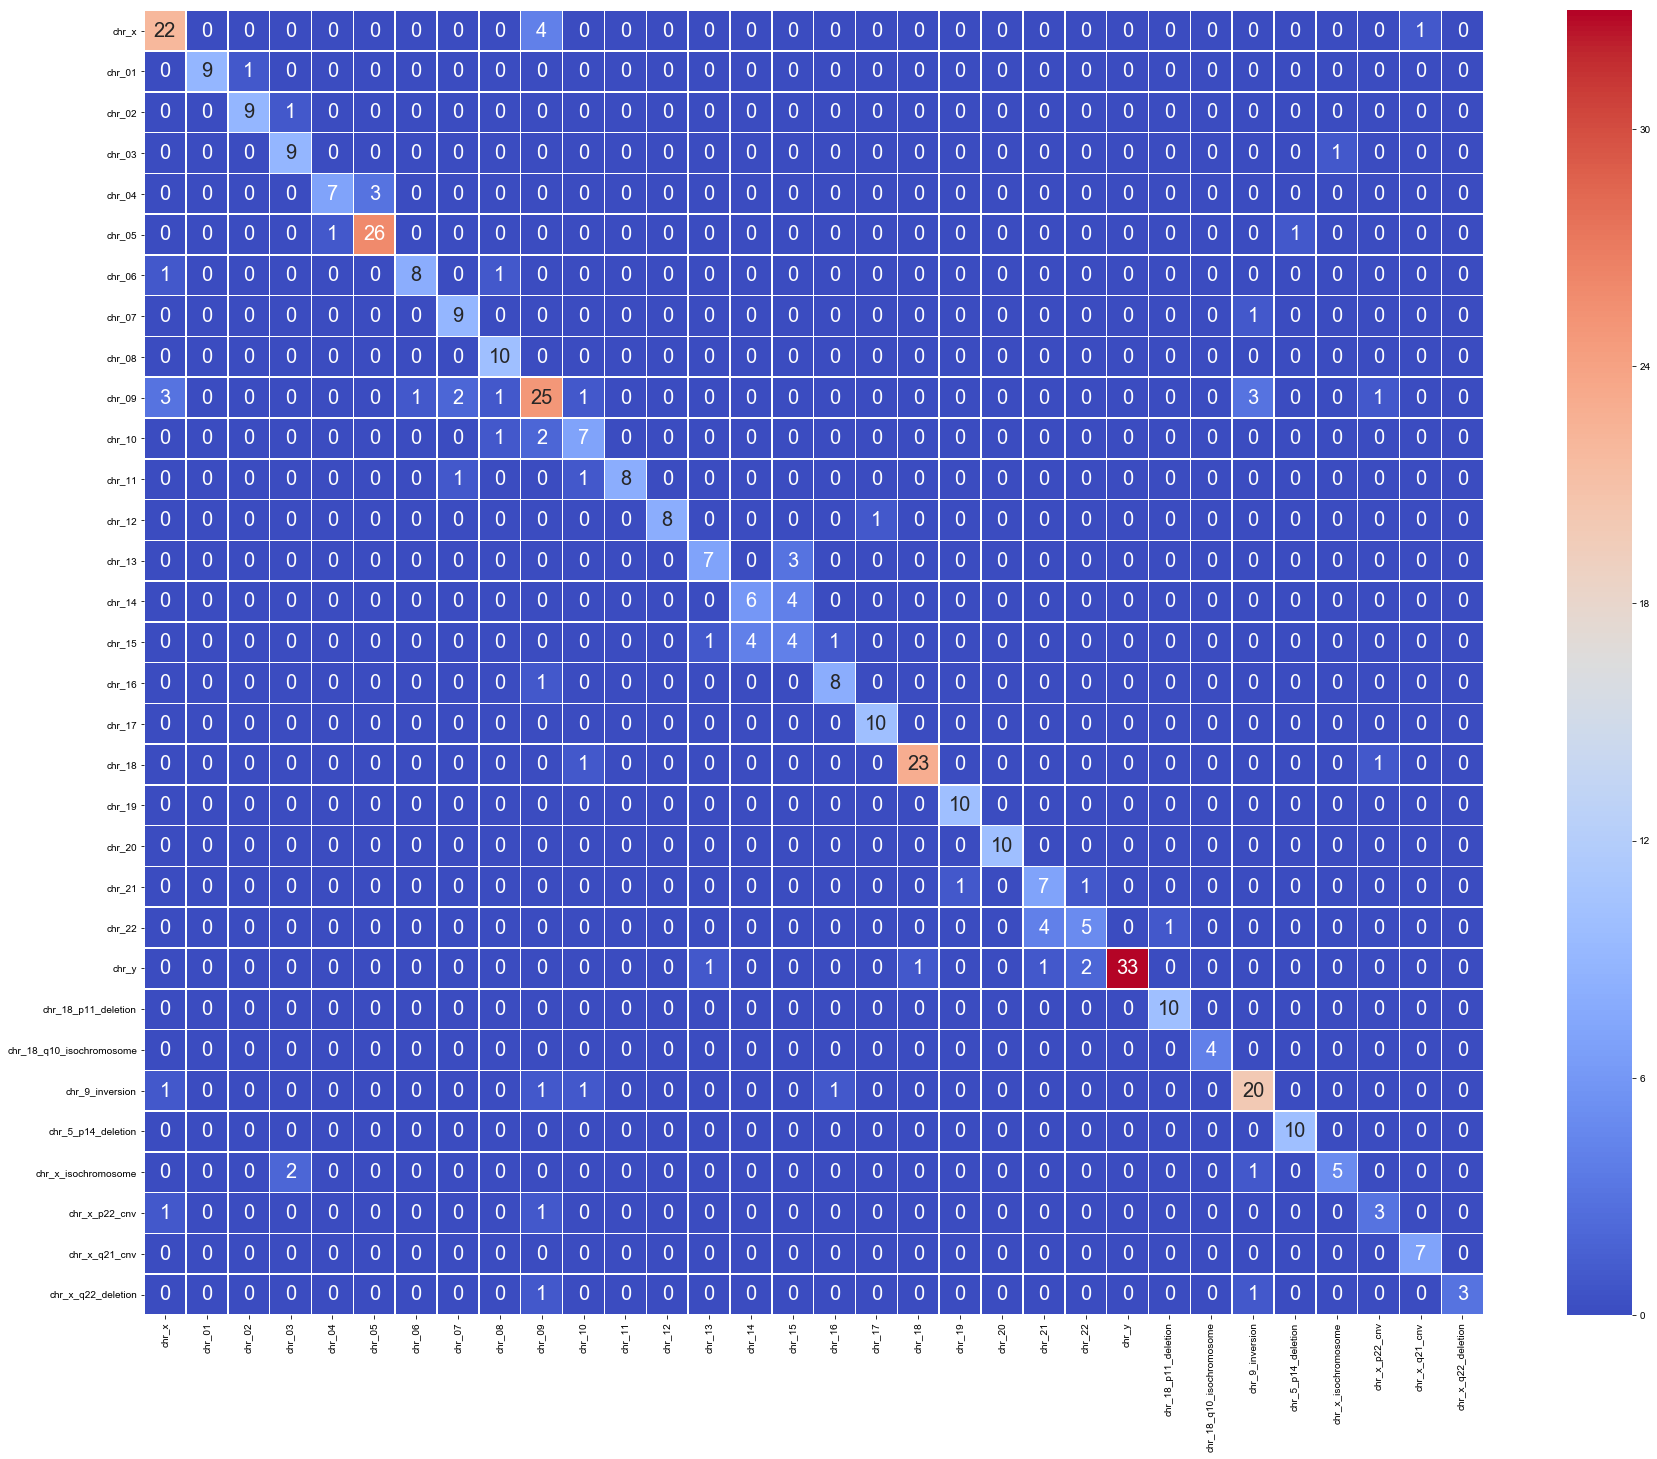

In [41]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map: Rate (important!!!)

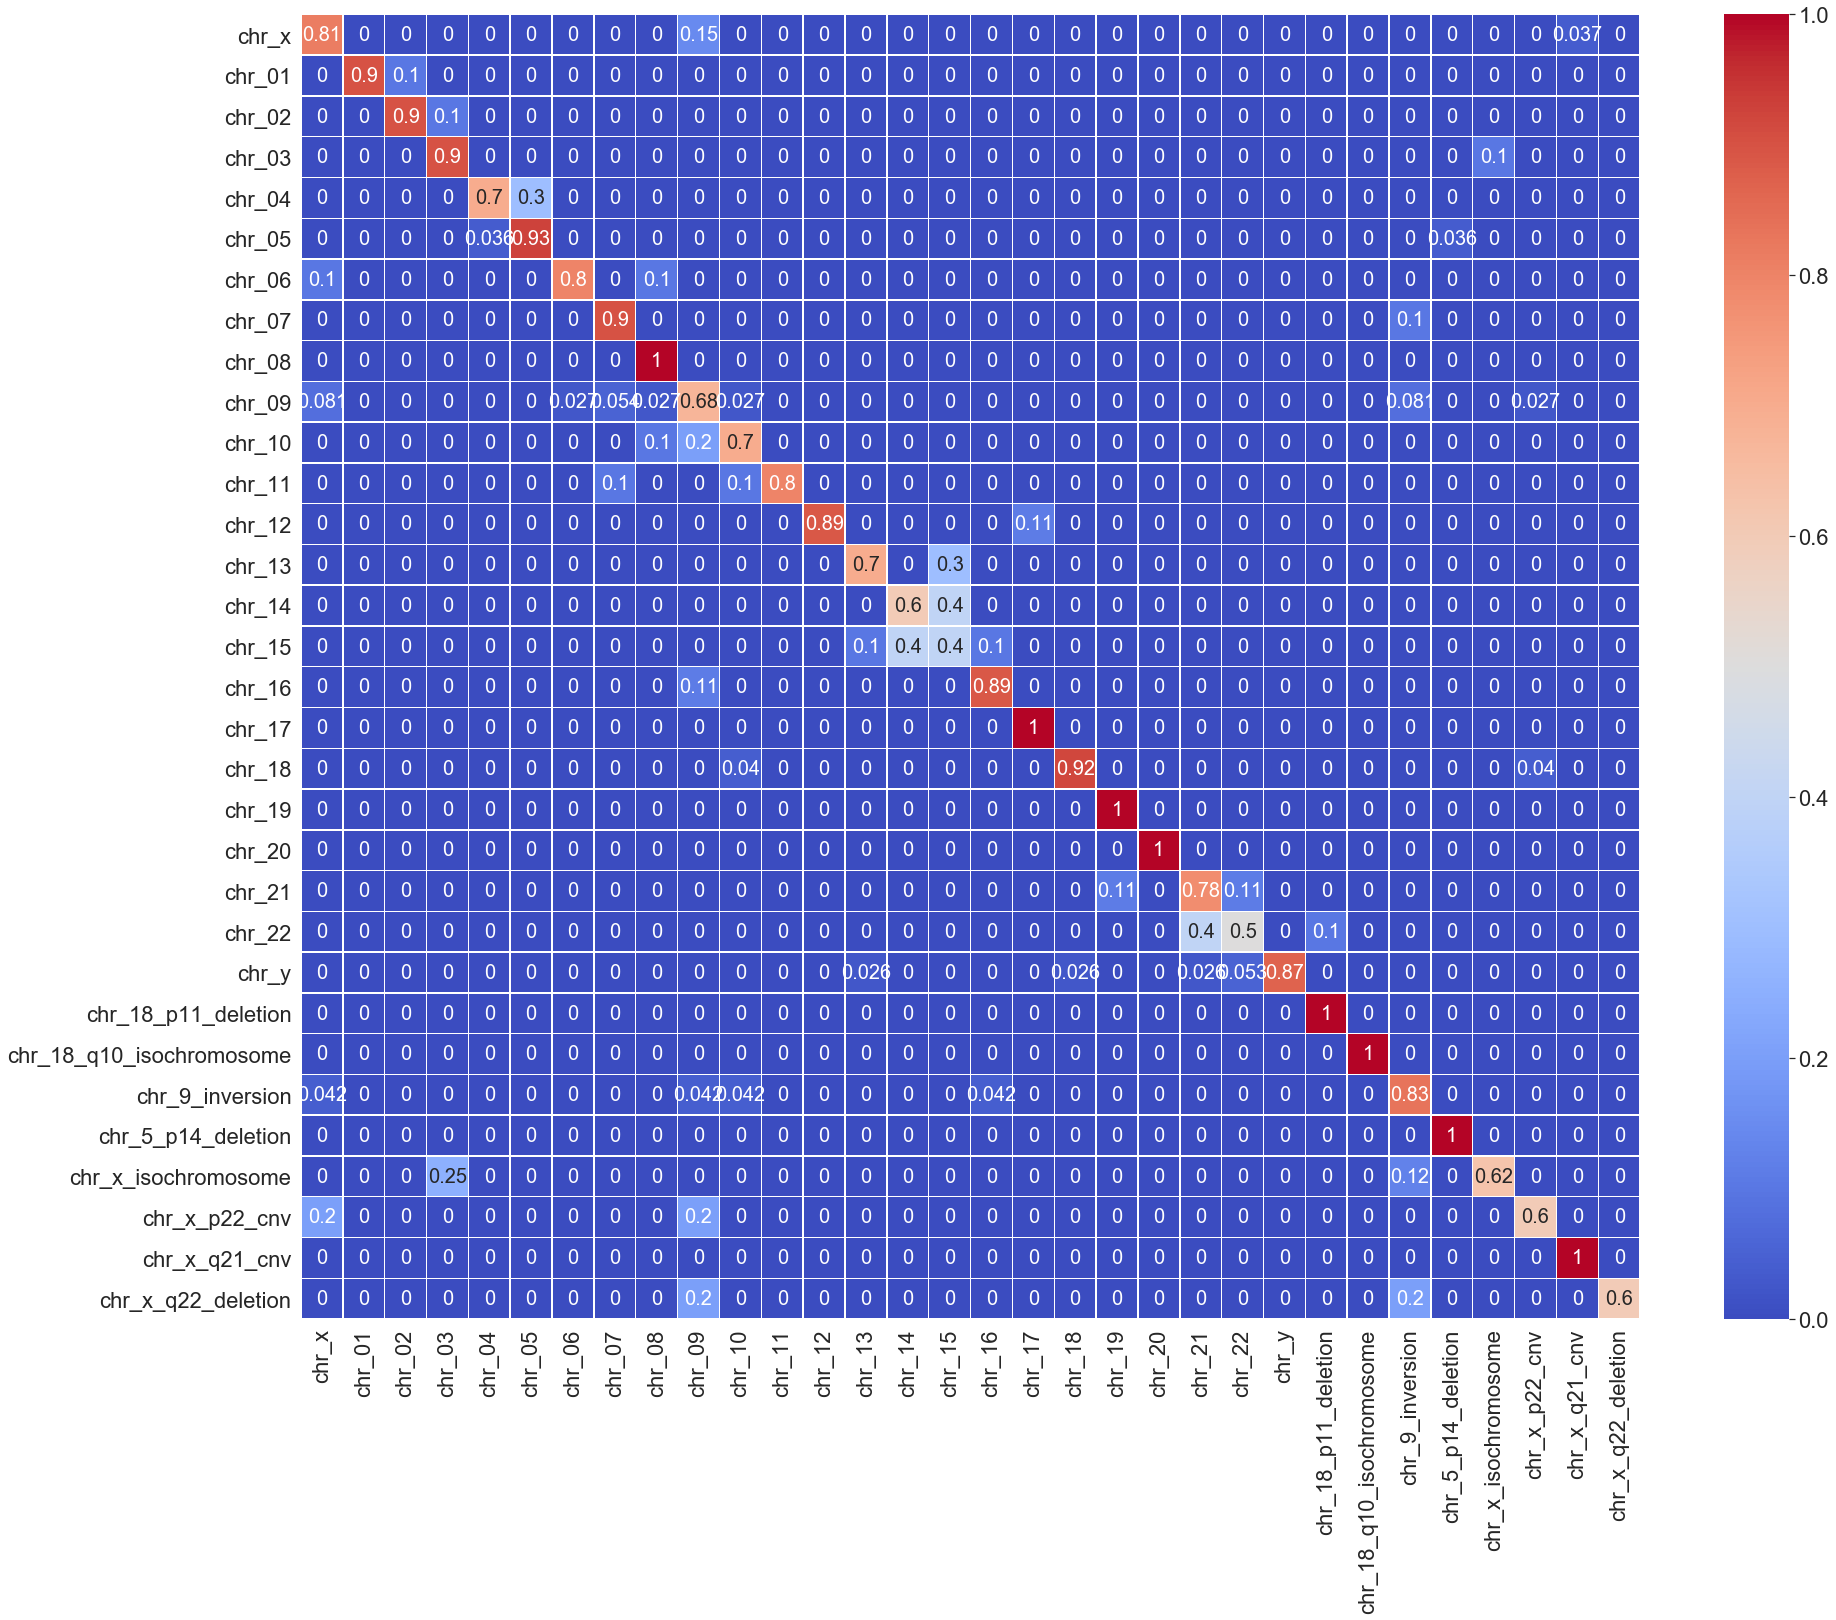

In [42]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [43]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [44]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Rate_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [45]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.824


In [46]:
print(performanceReport)

                          precision    recall  f1-score   support

                   chr_x       0.79      0.81      0.80        27
                  chr_01       1.00      0.90      0.95        10
                  chr_02       0.90      0.90      0.90        10
                  chr_03       0.75      0.90      0.82        10
                  chr_04       0.88      0.70      0.78        10
                  chr_05       0.90      0.93      0.91        28
                  chr_06       0.89      0.80      0.84        10
                  chr_07       0.75      0.90      0.82        10
                  chr_08       0.77      1.00      0.87        10
                  chr_09       0.71      0.68      0.69        37
                  chr_10       0.64      0.70      0.67        10
                  chr_11       1.00      0.80      0.89        10
                  chr_12       1.00      0.89      0.94         9
                  chr_13       0.78      0.70      0.74        10
         

In [47]:
type(performanceReport)

str

In [48]:
confusion

chr_x  chr_01  chr_02  chr_03  chr_04  chr_05  \
chr_x                        22       0       0       0       0       0   
chr_01                        0       9       1       0       0       0   
chr_02                        0       0       9       1       0       0   
chr_03                        0       0       0       9       0       0   
chr_04                        0       0       0       0       7       3   
chr_05                        0       0       0       0       1      26   
chr_06                        1       0       0       0       0       0   
chr_07                        0       0       0       0       0       0   
chr_08                        0       0       0       0       0       0   
chr_09                        3       0       0       0       0       0   
chr_10                        0       0       0       0       0       0   
chr_11                        0       0       0       0       0       0   
chr_12                        0       0       0       0       0       0   
chr_13                        0       0       0       0       0       0   
chr_14                        0       0       0       0       0       0   
chr_15                        0       0       0       0       0       0   
chr_16                        0       0       0       0       0       0   
chr_17                        0       0       0       0       0       0   
chr_18                        0       0       0       0       0       0   
chr_19                        0       0       0       0       0       0   
chr_20                        0       0       0       0       0       0   
chr_21                        0       0       0       0       0       0   
chr_22                        0       0       0       0       0       0   
chr_y                         0       0       0       0       0       0   
chr_18_p11_deletion           0       0       0       0       0       0   
chr_18_q10_isochromosome      0       0       0       0       0       0   
chr_9_inversion               1       0       0       0       0       0   
chr_5_p14_deletion            0       0       0       0       0       0   
chr_x_isochromosome           0       0       0       2       0       0   
chr_x_p22_cnv                 1       0       0       0       0       0   
chr_x_q21_cnv                 0       0       0       0       0       0   
chr_x_q22_deletion            0       0       0       0       0       0   

                          chr_06  chr_07  chr_08  chr_09  ...  chr_22  chr_y  \
chr_x                          0       0       0       4  ...       0      0   
chr_01                         0       0       0       0  ...       0      0   
chr_02                         0       0       0       0  ...       0      0   
chr_03                         0       0       0       0  ...       0      0   
chr_04                         0       0       0       0  ...       0      0   
chr_05                         0       0       0       0  ...       0      0   
chr_06                         8       0       1       0  ...       0      0   
chr_07                         0       9       0       0  ...       0      0   
chr_08                         0       0      10       0  ...       0      0   
chr_09                         1       2       1      25  ...       0      0   
chr_10                         0       0       1       2  ...       0      0   
chr_11                         0       1       0       0  ...       0      0   
chr_12                         0       0       0       0  ...       0      0   
chr_13                         0       0       0       0  ...       0      0   
chr_14                         0       0       0       0  ...       0      0   
chr_15                         0       0       0       0  ...       0      0   
chr_16                         0       0       0       1  ...       0      0   
chr_17                         0       0       0       0  ...       0      0   
chr_18                        

## Export to a text file

In [49]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()